In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm

In [3]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.40', '1.0.0')

In [4]:
torch.cuda.set_device(0)

In [5]:
path = Path('/home/gaurav/PycharmProjects/nlp-for-nepali/language-model')

In [6]:
p = path.glob('NepaliWikipediaArticles/*')
files = [x for x in p if x.is_file()]

In [7]:
len(files)

38757

In [8]:
train_files, test_files = train_test_split(files, test_size=0.3)

In [9]:
len(train_files), len(test_files)

(27129, 11628)

In [10]:
train_files[0]

PosixPath('/home/gaurav/PycharmProjects/nlp-for-nepali/language-model/NepaliWikipediaArticles/5622.pkl')

In [11]:
str(train_files[0]).split('/')[-1][:-4]

'5622'

In [12]:
# Preparing dataset for fastai
for file in train_files:
    with open(file, 'rb') as f:
        text = pickle.load(f)
    with open(path/'NepaliDataset'/'train'/(str(file).split('/')[-1][:-4]+'.txt'), "w") as text_file:
        text_file.write(text)

In [13]:
for file in test_files:
    with open(file, 'rb') as f:
        text = pickle.load(f)
    with open(path/'NepaliDataset'/'valid'/(str(file).split('/')[-1][:-4]+'.txt'), "w") as text_file:
        text_file.write(text)

In [14]:
class NepaliTokenizer(BaseTokenizer):
    def __init__(self, lang:str):
        self.lang = lang
        self.sp = spm.SentencePieceProcessor()
        self.sp.Load(str(path/"../tokenizer/nepali_lm.model"))
        
    def tokenizer(self, t:str) -> List[str]:
        return self.sp.EncodeAsPieces(t)

In [15]:
sp = spm.SentencePieceProcessor()
sp.Load(str(path/"../tokenizer/nepali_lm.model"))
itos = [sp.IdToPiece(int(i)) for i in range(15000)]

In [16]:
itos

['<unk>',
 '<s>',
 '</s>',
 '▁',
 'को',
 '।',
 ',',
 'मा',
 '▁।',
 '▁र',
 '.',
 'ले',
 'का',
 '▁छ',
 '▁हो',
 'लाई',
 '▁•',
 '▁यो',
 '▁q',
 '▁�',
 '▁पनि',
 '▁एक',
 'X',
 '▁यस',
 '▁थियो',
 'बाट',
 '▁तथा',
 'न',
 'ी',
 '▁भएको',
 '-',
 'हरू',
 '▁छन्',
 '�',
 '▁थिए',
 '▁रहेको',
 '▁मा',
 'र',
 'ा',
 '▁लागि',
 'े',
 '▁भने',
 'क',
 '▁हुन्छ',
 'स',
 '▁वा',
 '▁गर्ने',
 '▁गर्न',
 '▁रूपमा',
 ':',
 '▁हुन्',
 '▁आफ्नो',
 '▁विकास',
 '▁नेपाली',
 'म',
 '▁नेपालको',
 '▁सन्',
 '▁नेपाल',
 'ल',
 'ला',
 '▁नै',
 '▁गरेको',
 '▁उनले',
 '▁को',
 '▁गरिएको',
 '▁उनी',
 'हरु',
 '▁तर',
 'ता',
 '▁गरे',
 '▁वि',
 '▁गरेका',
 '▁यसको',
 '▁नाम',
 'हरूको',
 '▁अनुसार',
 '▁हुने',
 '▁वर्ष',
 '▁देखि',
 '▁क्षेत्र',
 'ि',
 '▁धेरै',
 '▁हुन',
 'ै',
 '▁एउटा',
 'ं',
 '▁दिन',
 'सँग',
 '▁जिल्ला',
 '▁गरिन्छ',
 '▁भन्ने',
 "'",
 'त',
 '▁गरी',
 '▁अ',
 '▁उनको',
 '्',
 '▁कुनै',
 'द्वारा',
 'ित',
 '▁पछि',
 '▁सबै',
 'ो',
 'की',
 '▁भयो',
 '▁अवस्थित',
 '▁जिल्लामा',
 '▁जन्म',
 'देखि',
 '▁जिल्लाको',
 '▁गाउँ',
 '▁केही',
 '"',
 '▁समिति',
 '▁राष्ट्रिय',


In [17]:
# 15,000 is the vocab size that we chose in sentencepiece
nepali_vocab = Vocab(itos)

In [18]:
tokenizer = Tokenizer(tok_func=NepaliTokenizer, lang='ne')

In [19]:
tokenizer.special_cases

['xxunk', 'xxpad', 'xxbos', 'xxfld', 'xxmaj', 'xxup', 'xxrep', 'xxwrep']

In [20]:
data_lm = TextLMDataBunch.from_folder(path=path/'NepaliDataset', tokenizer=tokenizer, vocab=nepali_vocab)

In [21]:
data_lm.batch_size

64

In [22]:
data_lm.save()

In [23]:
data_lm.show_batch()

idx,text
0,▁ x x b os ▁युइएफए ▁युरो ▁2016 ▁15 औँ ▁युरोपेली ▁अन्तर्राष्ट्रिय ▁पुरुष ▁फुटबल ▁प्रतियोगिता ▁हो ▁। ▁यो ▁फ्रान्स मा ▁10 ▁जुन ▁देखि ▁10 ▁जुलाई ▁2016 ▁सम्म ▁सञ्चालन ▁भएको ▁हो ▁। ▁युरो क प मा ▁सहभागी ▁राष्ट्रहरू ▁16 ▁बाट ▁बढाएर ▁24 ▁पुर् ▁या इएको ▁थियो ▁। ▁यस ▁कारणले ▁यस ▁पटक ▁नयाँ ▁राष्ट्रहरू ले ▁समेत ▁यस ▁प्रतियोगितामा ▁स्थान ▁बनाएका ▁थिए ▁। ▁स्पेन ▁हालसम्म ▁सन् ▁2008 ▁र ▁सन् ▁2012 ▁गरि ▁दुई ▁पटक
1,ल्स ले ▁टिमको ▁प्रतिनिधित्व ▁अन्तर्राष्ट्रिय ▁खेलमा ▁राष्ट्रिय ▁टोली बाट ▁गरिसकेका ▁छन् ▁। ▁यस ▁टिमले ▁सन् ▁2015 ▁अगस्ट ▁सम्म ▁65 ▁म्याच ▁खेल िसकेको ▁छ ▁। ▁यस ▁टिमको ▁जित ▁प्रतिशत ▁6 0% ▁रहेको ▁छ ▁। ▁ x x b os ▁बग र ▁ज्याम ी ▁नेपालमा ▁पाइने ▁एक ▁प्रकारको ▁चरा को ▁नाम ▁हो ▁। ▁यसलाई ▁अङ्ग्रेजीमा ▁र डी ▁टर् न स्टोन ▁भनिन्छ ▁। ▁बग र ▁ज्याम ी ▁बा ल्ड ▁हेड ▁टापु मा ▁फ्लोरिन
2,"▁राक्षस बाट ▁हुने ▁बाह्य ▁प्रकोप बाट ▁बच्न को लागी ▁पूजा ▁गरेको ▁पाइएको ▁छ ▁। ▁हुनत ▁राक्षस ▁र ▁देवता ▁कुनै ▁अलग ▁संसार का ▁प्राणी ▁होइनन् ▁। ▁राक्षस ▁र ▁देवता ▁भन्ने ▁मानव हरूको ▁स्वभाव मा ▁पर्ने ▁फरक ता बाट ▁छुट् ट य ाउन ▁सकिन्छ ▁। ▁सबै सँग ▁नराम्रो ▁व्यवहार ▁गर्ने , ▁समाजमा ▁ उछ ्र िङ कल ▁उत् पात ▁र ▁आतंक ▁म च ाउने , ▁बढी ▁पाप ▁कर्म ▁गर्ने , ▁यदी ▁धार्मीक"
3,os ▁ x x b os ▁नु ब चे ▁नेपालको ▁सोलुखुम्बु ▁जिल्लाको ▁खुम्बु ▁क्षेत्रमा ▁अवस्थित ▁महा ल ङ्गु र ▁हिमश्रृंखला ▁अन्तर्गत ▁पर्ने ▁हिमाल ▁हो । ▁यो ▁सगरमाथा बाट ▁2 ▁किलोमिटर को ▁दुरी मा ▁रहेको ▁छ । ▁यो ▁हिमाल ▁सगरमाथा को ▁पश्चिममा ▁रहेको ले ▁यसको ▁नाम ▁तिब्बती ▁र ▁शेर्पा ▁भाषामा ▁नु ब चे ▁भनिन्छ ▁जसको ▁अर्थ ▁अंग्रेजी मा ▁ er n ak ▁र ▁नेपाली मा ▁पश्चिमी ▁शिखर ▁भन्ने
4,▁लेखिएको ▁कृति ▁हो । ▁यस ▁कृति लाई ▁साझा ▁प्रकाशन ले ▁बजारमा ▁ल्याएको ▁हो । ▁यो ▁एक ▁नेपाली ▁भाषाको ▁निबन्ध ▁सङ् ▁ग्रह ▁हो । ▁ x x b os ▁कोलेस्टेरोल ▁शरीर का ▁प्रत्येक ▁कोष हरूमा ▁पाइने ▁नरम ▁चिल्लो ▁पदार्थ ▁हो ▁| यस को ▁उत्पादन ▁प्रमुख रूपमा ▁कलेजो मा ▁हुन्छ । स्व स्थ ्य ▁जीवनका ▁लागि ▁को ले स्ट्र ोल ▁आवश्यक ▁हुन्छ ▁। ▁रगतमा ▁पाइने ▁बोसो लाई ▁का ले स्ट्र ोल ▁भनिन्छ


In [24]:
len(data_lm.vocab.itos)

15000

In [25]:
data_lm.vocab.stoi

defaultdict(int,
            {'<unk>': 0,
             '<s>': 1,
             '</s>': 2,
             '▁': 3,
             'को': 4,
             '।': 5,
             ',': 6,
             'मा': 7,
             '▁।': 8,
             '▁र': 9,
             '.': 10,
             'ले': 11,
             'का': 12,
             '▁छ': 13,
             '▁हो': 14,
             'लाई': 15,
             '▁•': 16,
             '▁यो': 17,
             '▁q': 18,
             '▁�': 19,
             '▁पनि': 20,
             '▁एक': 21,
             'X': 22,
             '▁यस': 23,
             '▁थियो': 24,
             'बाट': 25,
             '▁तथा': 26,
             'न': 27,
             'ी': 28,
             '▁भएको': 29,
             '-': 30,
             'हरू': 31,
             '▁छन्': 32,
             '�': 33,
             '▁थिए': 34,
             '▁रहेको': 35,
             '▁मा': 36,
             'र': 37,
             'ा': 38,
             '▁लागि': 39,
             'े': 40,
             '▁भने': 41,
  

In [26]:
learn = language_model_learner(data_lm, drop_mult=0.3)

In [27]:
gc.collect()

0

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


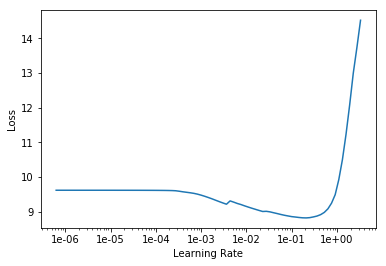

In [29]:
learn.recorder.plot()

In [30]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.981783,4.914091,0.244682


In [31]:
learn.save('first', with_opt=True)

In [32]:
learn.load('first', with_opt=True);

In [33]:
learn.unfreeze()

In [34]:
learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.703696,4.865650,0.245472
2,4.734961,4.760561,0.252126
3,4.428511,4.455662,0.282117
4,4.029394,4.140379,0.322218
5,3.621300,4.050271,0.336316


In [35]:
learn.save('second_ne_lm', with_opt=True)

In [36]:
learn.load('second_ne_lm', with_opt=True);

In [37]:
learn.fit_one_cycle(50, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,3.530143,4.045897,0.337327
2,3.545625,4.038839,0.338703
3,3.517672,4.028398,0.340317
4,3.521355,4.015224,0.342755
5,3.516877,3.997406,0.345512
6,3.535543,3.978984,0.348755
7,3.414012,3.956365,0.352593
8,3.529660,3.932527,0.356515
9,3.459082,3.908514,0.360790
10,3.360775,3.880475,0.365828


In [38]:
learn.save('third_ne_lm', with_opt=True)

In [39]:
learn.load('third_ne_lm', with_opt=True);

In [40]:
TEXT = "अन्तर्राष्ट्रिय खेलमा राष्ट्रिय "
N_WORDS = 40
N_SENTENCES = 2

In [41]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

अन्तर्राष्ट्रिय खेलमा राष्ट्रिय  ▁स्तर को ▁पदक ▁जित्ने ▁एक ▁मुख्य ▁खेलाडी ▁हुन् ▁। ▁जो ▁भने ▁आफ्नो ▁व्यक्तिगत ▁टिम लि भर मा ▁स्थान ान्तर े ▁लागि ▁छन् ▁। ▁साथै , ▁उनी ▁सबै ▁भन्दा ▁धेरै ▁कम ▁उमेरमा ▁मात्र ▁सन्तोष जनक लाई ▁पूर्ण ता ंड ाएर ▁फुटबल
अन्तर्राष्ट्रिय खेलमा राष्ट्रिय  ▁स्तर को ▁विश्वविद्यालय हरूमा ▁एक ▁निःशुल्क ▁प्रदर्शन ▁गरेको ▁पाईन्छ ▁। ▁यसमा ▁एक ▁विशेष ▁बेला ▁मृत्यु ▁भन्दा ▁पनि ▁बच्चा को ▁जन्म दर ▁छ ▁। ▁सन् ▁1990 ▁मा , ▁र वि . ▁1950 ▁मा ▁दक्षिण ▁अफ्रिका ▁र ▁विश्व ▁भर ▁मा ▁सबैभन्दा ▁लाख


In [42]:
np.exp(3.45)

31.500392308747937